# Exploratory Data Analysis

### Find relationships in the data between the columns

Firsly let's have a look at the dependency between qualifying and race finishing positions. You can imagine that the higher you qualify the higher the chance of finishing top.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

It appears there is a starting grid position 0. This seems to indicate pit-lane start or a DNQ (so no race participation), not an ordinary grid start.

In [23]:
results = pd.read_csv('f1_dataset/results_fixed.csv')
zero_grid = results.loc[results['grid'] == 0]
zero_grid.head(5)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
2281,2281,2282,127,62,18,22,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77
2432,2432,2433,134,49,21,20,0,-1,F,20,0.0,0,\N,\N,\N,\N,\N,\N,81
2433,2433,2434,134,59,21,21,0,-1,F,21,0.0,0,\N,\N,\N,\N,\N,\N,81
2434,2434,2435,134,21,17,9,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,82
2797,2797,2798,151,58,18,20,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77


In [25]:
start_finish = results.drop(results[results.grid == 0].index)
start_finish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24464 entries, 0 to 26079
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24464 non-null  int64  
 1   resultId         24464 non-null  int64  
 2   raceId           24464 non-null  int64  
 3   driverId         24464 non-null  int64  
 4   constructorId    24464 non-null  int64  
 5   number           24464 non-null  object 
 6   grid             24464 non-null  int64  
 7   position         24464 non-null  int64  
 8   positionText     24464 non-null  object 
 9   positionOrder    24464 non-null  int64  
 10  points           24464 non-null  float64
 11  laps             24464 non-null  int64  
 12  time             24464 non-null  object 
 13  milliseconds     24464 non-null  object 
 14  fastestLap       24464 non-null  object 
 15  rank             24464 non-null  object 
 16  fastestLapTime   24464 non-null  object 
 17  fastestLapSpeed  

**Insight 1:**
The most probable outcome is that a driver starting on pole will finish first. This has happened 464 times in the dataset, or 1.897% of all driver outcomes result in pole-to-win conversion.

**Insight 2:**
Drivers starting at the back are extremely likely to not finish the race. About 15% of all the results comes from drivers who started in the second half and DNFd.

In [51]:
start_finish_grouped = start_finish.groupby(['grid','position']).size().reset_index(name='count')
start_finish_grouped['percentage'] = start_finish_grouped['count'].div(start_finish_grouped['count'].sum()/100)
start_finish_grouped.sort_values(by='count',ascending=False).head(10)

,grid,position,count,percentage
1,1,1,464,1.896664
339,17,-1,446,1.823087
292,15,-1,437,1.786298
269,14,-1,435,1.778123
361,18,-1,434,1.774035
406,20,-1,428,1.749509
246,13,-1,427,1.745422
316,16,-1,427,1.745422
182,10,-1,424,1.733159
384,19,-1,423,1.729071


In [101]:
# to plot the data as a heat map we need to pivot the three columns into a 2D matrix
pivoted = start_finish_grouped.pivot(index='position', columns='grid', values='count')
# then caluctae percetage likelihood of a finishing position for each starting grid (i.e. go by columns)
pivoted = pivoted.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))
pivoted.head()

grid,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
position,,,,,,,,,,,,,,,,,,,,,
-1,23.68,24.91,27.28,29.78,32.88,33.55,33.61,34.52,34.61,38.69,...,55.48,60.48,69.57,53.33,60.0,73.68,50.00,35.29,23.08,100.0
1,42.11,23.72,12.23,6.01,4.37,3.57,2.09,1.55,0.46,1.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.16,20.51,18.25,13.84,8.56,6.51,4.81,3.29,3.37,1.64,...,0.33,NaN,NaN,NaN,NaN,NaN,NaN,5.88,NaN,NaN
3,6.72,10.99,15.97,13.93,11.93,8.62,6.36,5.39,4.74,3.10,...,NaN,1.21,NaN,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4.26,5.31,8.30,11.66,12.39,9.90,7.27,7.95,7.38,4.01,...,NaN,0.81,NaN,NaN,NaN,NaN,5.56,NaN,7.69,NaN


(0.0, 25.0)

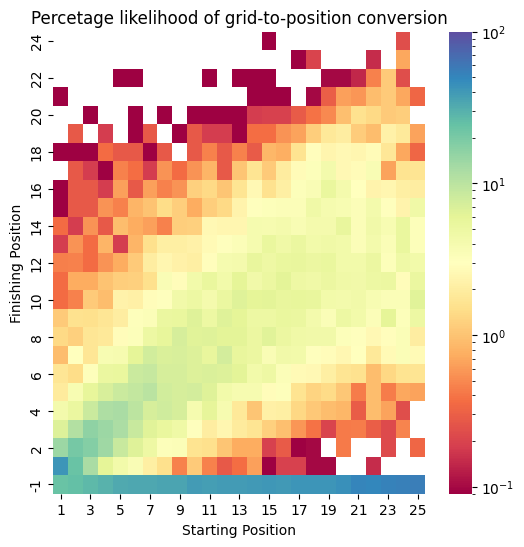

In [109]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=pivoted, annot=annot,cmap=cmap,vmin = 0, vmax=50, norm=LogNorm())
plt.ylabel('Finishing Position')
plt.xlabel('Starting Position')
plt.title('Percentage likelihood of grid-to-position conversion')
plt.xlim([0,25])
plt.ylim([0, 25])


In the event that the driver does finish the race - DNF excluding - what is the most likely position for each starting grid for all drivers.

/var/folders/4z/0b31nkj9457081mx9h796b240000gn/T/ipykernel_91968/777083655.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})


Text(0.5, 1.0, 'Most likely finishing position for each grid start. Correlation = 0.86')

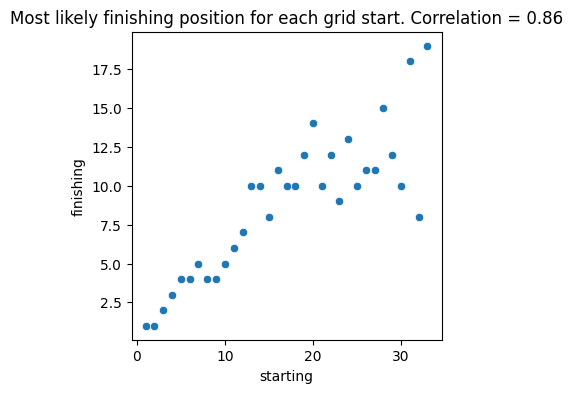

In [127]:
# dropping label -1 and finidng most common
a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})
corr = a.corr()
corr_num = corr['starting'].iloc[1]
plt.figure(figsize=(4,4))
sns.scatterplot(data = a, x = 'starting', y = 'finishing')
plt.title('Most likely finishing position for each grid start. Correlation = {}'.format(round(corr_num,2)))
